In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import json
import numpy as np
import cv2
import os

In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
'''
#original
TRAIN_DIR = "/gdrive/MyDrive/Dataflow/TRAIN"
TEST_DIR = "/gdrive/MyDrive/Dataflow/TEST"
LABLE_DIR = "/gdrive/MyDrive/Metadata"
CATEGORIES = ['0','1','2','3','4']
Label_Count = [0, 0, 0, 0, 0]
IMG_SIZE = 150
'''

In [ ]:
#original
TRAIN_DIR = "/gdrive/MyDrive/b_fix_dataflow/TRAIN"
TEST_DIR = "/gdrive/MyDrive/b_fix_dataflow/TEST"
LABLE_DIR = "/gdrive/MyDrive/Metadata"
CATEGORIES = ['0','1','2','3','4']
Label_Count = [0, 0, 0, 0, 0]
IMG_SIZE = 150

In [ ]:
#배경전부포함
def bbox_swap(bbox1, bbox2):
    return bbox2, bbox1

def bbox_get(img, img_name):
    js_path = LABLE_DIR + "/" + img_name.split('.')[0] + ".json"
    js_data = json.load(open(js_path))
    bbox = np.array(js_data['annotations'][0]['bbox'],dtype=int)
    bbox = list(map(abs,bbox))
    #print(js_path)
    if(bbox[1] > bbox[3]):
        bbox[1], bbox[3]=bbox_swap(bbox[1], bbox[3])
    elif(bbox[0] > bbox[2]):
        bbox[0], bbox[2]=bbox_swap(bbox[0], bbox[2])
    '''
    bbox[0]+=IMG_SIZE
    bbox[1]+=IMG_SIZE
    bbox[2]-=IMG_SIZE
    bbox[3]-=IMG_SIZE
    '''
    return bbox

In [ ]:
#배경x
def bbox_swap(bbox1, bbox2):
    return bbox2, bbox1

def bbox_get(img, img_name):
    js_path = LABLE_DIR + "/" + img_name.split('.')[0] + ".json"
    js_data = json.load(open(js_path))
    bbox = np.array(js_data['annotations'][0]['bbox'],dtype=int)
    bbox = list(map(abs,bbox))
    print(js_path)
    if(bbox[1] > bbox[3]):
        bbox[1], bbox[3]=bbox_swap(bbox[1], bbox[3])
    elif(bbox[0] > bbox[2]):
        bbox[0], bbox[2]=bbox_swap(bbox[0], bbox[2])

    bbox[0]+=IMG_SIZE
    bbox[1]+=IMG_SIZE
    bbox[2]-=IMG_SIZE
    bbox[3]-=IMG_SIZE

    return bbox

1389914.3024625268


In [ ]:
#fix_2022_10_23
#small img 20000
import cv2
import os

training_data = []
testing_data = []

def create_data_array(arr, dir_path):
    for category in CATEGORIES:

        path = os.path.join(dir_path, category)
        class_num = CATEGORIES.index(category)
        for img_name in os.listdir(path):
            print(Label_Count[class_num], class_num)
            if(Label_Count[class_num]>10000):
                break
            try:
                #print(img_name)
                img = cv2.imread(os.path.join(path, img_name))
                img_RGB=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                bbox=bbox_get(img_RGB,img_name)
                width, height= bbox[2]-bbox[0],bbox[3]-bbox[1]
                tbox=bbox[0]
                for i in range(height // IMG_SIZE):
                    bbox[3]=bbox[1]+IMG_SIZE
                    bbox[0]=tbox
                    for j in range(width // IMG_SIZE):
                        bbox[2]=bbox[0]+IMG_SIZE
                        #img_cropping = img_RGB[bbox[1]:bbox[3], bbox[0]:bbox[2]]
                        fix_img = img_RGB[bbox[1]:bbox[3], bbox[0]:bbox[2]]
                        #img_padding = zeropadding(img_cropping)
                        #fix_img = cv2.resize(img_padding, (IMG_SIZE, IMG_SIZE))
                        arr.append([fix_img, class_num])
                        Label_Count[class_num]+=1
                        bbox[0]=bbox[2]
                    bbox[1]=bbox[3]

            except Exception as e:
                pass

In [ ]:
#fix_2022_10_23
#small img all
import cv2
import os

training_data = []
testing_data = []

def create_data_array(arr, dir_path):
    for category in CATEGORIES:

        path = os.path.join(dir_path, category)
        class_num = CATEGORIES.index(category)
        for img_name in os.listdir(path):
            print(Label_Count[class_num], class_num)
            #if(Label_Count[class_num]>20000):
                #break
            try:
                #print(img_name)
                img = cv2.imread(os.path.join(path, img_name))
                img_RGB=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                bbox=bbox_get(img_RGB,img_name)
                width, height= bbox[2]-bbox[0],bbox[3]-bbox[1]
                tbox=bbox[1]
                for i in range(width // IMG_SIZE):
                    bbox[2]=bbox[0]+IMG_SIZE
                    bbox[1]=tbox
                    for j in range(height // IMG_SIZE):
                        bbox[3]=bbox[1]+IMG_SIZE
                        #img_cropping = img_RGB[bbox[1]:bbox[3], bbox[0]:bbox[2]]
                        fix_img = img_RGB[bbox[1]:bbox[3], bbox[0]:bbox[2]]
                        #img_padding = zeropadding(img_cropping)
                        #fix_img = cv2.resize(img_padding, (IMG_SIZE, IMG_SIZE))
                        arr.append([fix_img, class_num])
                        Label_Count[class_num]+=1
                        bbox[1]=bbox[3]
                    bbox[0]=bbox[2]

            except Exception as e:
                pass

In [ ]:
#fix_2022_10_23
#big img

def bbox_swap(bbox1, bbox2):
    return bbox2, bbox1


def cropping(img, img_name):
    js_path = LABLE_DIR + "/" + img_name.split('.')[0] + ".json"
    js_data = json.load(open(js_path))
    bbox = np.array(js_data['annotations'][0]['bbox'],dtype=int)
    bbox = list(map(abs,bbox))
    if(bbox[1]>bbox[3]):
        bbox[1],bbox[3]=bbox_swap(bbox[1],bbox[3])
    elif(bbox[0]>bbox[2]):
        bbox[0],bbox[2]=bbox_swap(bbox[0],bbox[2])
    
    fix_img = img[bbox[1]:bbox[3], bbox[0]:bbox[2]]
    return fix_img


def zeropadding(img):
    height, width = img.shape[0:2]
    margin = [np.abs(height - width) // 2, np.abs(height - width) // 2]
    if np.abs(height - width) % 2 != 0:
        margin[0] += 1
    if height < width:
        margin_list = [margin, [0, 0]]
    else:
        margin_list = [[0, 0], margin]
    if len(img.shape) == 3:
        margin_list.append([0,0])
    fix_img = np.pad(img, margin_list, mode='constant')
    return fix_img


training_data = []
testing_data = []
Label_Count = [0, 0, 0, 0, 0]

def create_data_array(arr, dir_path):
    for category in CATEGORIES:
        path = os.path.join(dir_path, category)
        class_num = CATEGORIES.index(category)
        for img_name in os.listdir(path):
            try:
                img = cv2.imread(os.path.join(path, img_name))
                img_RGB=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img_cropping = cropping(img_RGB,img_name)
                img_padding = zeropadding(img_cropping)
                fix_img = cv2.resize(img_padding, (IMG_SIZE, IMG_SIZE))
                arr.append([fix_img, class_num])
                Label_Count[class_num]+=1
            except Exception as e:
                pass

In [ ]:
create_data_array(training_data,TRAIN_DIR)
#create_data_array(testing_data,TEST_DIR)

print(len(training_data))
print(len(testing_data))

2293
0


In [ ]:
Label_Count_X=[0,0,0,0,0]
for i in range(5):
    Label_Count_X[i]=Label_Count[i]
Label_Count=[0,0,0,0,0]
create_data_array(testing_data,TEST_DIR)
print(len(testing_data))

544


In [ ]:
#normalizing, float, generator

import random

train_X = []
train_Y = []

for features, label in training_data:
    train_X.append(features)
    train_Y.append(label)

train_X=np.array(train_X)
train_Y=np.array(train_Y)

test_X = []
test_Y = []

for features, label in testing_data:
    test_X.append(features)
    test_Y.append(label)

test_X=np.array(test_X)
test_Y=np.array(test_Y)

print(train_X.shape)
print(test_X.shape)

(2293, 150, 150, 3)
(544, 150, 150, 3)


In [ ]:
#normalizing, label_count, reshape, shuffle

import random

random.shuffle(training_data)
random.shuffle(testing_data)

train_X = []
test_X = []
train_Y = []
test_Y = []

for features, label in training_data:
    train_X.append(features)
    train_Y.append(label)
    
for features, label in testing_data:
    test_X.append(features)
    test_Y.append(label)


#train_X = np.array(train_X)
#test_X = np.array(test_X)
train_Y = np.array(train_Y)
test_Y = np.array(test_Y)

train_X=np.array(train_X).reshape(-1,IMG_SIZE,IMG_SIZE,3)
test_X=np.array(test_X).reshape(-1,IMG_SIZE,IMG_SIZE,3)

train_X = train_X/255
test_X = test_X/255

print(train_X.shape, train_Y.shape)
print(test_X.shape, test_Y.shape)

(38305, 150, 150, 3) (38305,)
(13585, 150, 150, 3) (13585,)


In [ ]:
for i in Label_Count:
  print(i)

50
130
190
150
24


In [ ]:
print(Label_Count_X)

[229, 529, 785, 601, 149]


In [ ]:
#img Generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_generator = ImageDataGenerator(
            #rescale=1./255,
            rotation_range = 10,
            #zoom_range=0.10,
            shear_range = 0.5,
            width_shift_range = 0.10,
            height_shift_range = 0.10,
            horizontal_flip = True,
            vertical_flip = False)

def img_array_generator(count1, count2):
    global train_X
    global train_Y
    augment_size = 4000-count2
    randidx = np.random.randint(count1, count1+count2-1, size=augment_size)
    x_augmented = train_X[randidx].copy()
    y_augmented = train_Y[randidx].copy()
    x_augmented = img_generator.flow(x_augmented, np.zeros(augment_size),
                                    batch_size=augment_size, shuffle=False).next()[0]
    train_X = np.concatenate((train_X, x_augmented))
    train_Y = np.concatenate((train_Y, y_augmented))
    print(train_X.shape, train_Y.shape)

def test_array_generator(count1, count2):
    global test_X
    global test_Y
    augment_size = 2000-count2
    randidx = np.random.randint(count1, count1+count2-1, size=augment_size)
    x_augmented = test_X[randidx].copy()
    y_augmented = test_Y[randidx].copy()
    x_augmented = img_generator.flow(x_augmented, np.zeros(augment_size),
                                    batch_size=augment_size, shuffle=False).next()[0]
    test_X = np.concatenate((test_X, x_augmented))
    test_Y = np.concatenate((test_Y, y_augmented))
    print(test_X.shape, test_Y.shape)

In [ ]:
#test generator
def test_array_generator(count1, count2):
    global test_X
    global test_Y
    augment_size = 1000-count2
    randidx = np.random.randint(count1, count1+count2-1, size=augment_size)
    x_augmented = test_X[randidx].copy()
    y_augmented = test_Y[randidx].copy()
    x_augmented = img_generator.flow(x_augmented, np.zeros(augment_size),
                                    batch_size=augment_size, shuffle=False).next()[0]
    test_X = np.concatenate((test_X, x_augmented))
    test_Y = np.concatenate((test_Y, y_augmented))
    print(test_X.shape, test_Y.shape)

#generator exec

generator_index=0
for i in Label_Count:
    img_array_generator(generator_index, i)
    generator_index += i

In [ ]:
#generator exec

generator_index=0
for i in Label_Count_X:
    img_array_generator(generator_index, i)
    generator_index += i

(6064, 150, 150, 3) (6064,)
(9535, 150, 150, 3) (9535,)
(12750, 150, 150, 3) (12750,)
(16149, 150, 150, 3) (16149,)
(20000, 150, 150, 3) (20000,)


In [ ]:
train_X = train_X.astype('float32') / 255.
test_X = test_X.astype('float32') / 255.
train_X=np.array(train_X).reshape(-1,IMG_SIZE,IMG_SIZE,3)
test_X=np.array(test_X).reshape(-1,IMG_SIZE,IMG_SIZE,3)

In [ ]:
#generator normalizing
train_X=train_X/255
test_X=test_X/255
train_X=np.array(train_X).reshape(-1,IMG_SIZE,IMG_SIZE,3)
test_X=np.array(test_X).reshape(-1,IMG_SIZE,IMG_SIZE,3)

In [ ]:
#numpy shuffle

def np_shuffle():
    global train_X
    global train_Y
    idx = np.arange(train_X.shape[0])
    np.random.shuffle(idx)
    train_X = train_X[idx]
    train_Y = train_Y[idx]

np_shuffle()

In [ ]:
#VGGNET10

from tensorflow import keras
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(IMG_SIZE,IMG_SIZE,3), kernel_size=(3,3), filters=32, padding='same',activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same',activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Dropout(rate=0.2),
    
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Dropout(rate=0.2),
    
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=512, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Dropout(rate=0.2),
    
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=512, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Dropout(rate=0.2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=1024, activation='relu'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(units=5, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.SGD(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 64)       0         
 )                                                               
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 37, 37, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 128)       7

In [ ]:
#학습률 조정
sgd = tf.keras.optimizers.SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(optimizer=sgd,
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
#학습
from keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(monitor='val_loss', mode='min', min_delta=1e-3, patience=20, verbose=1)
history=model.fit(train_X,train_Y,batch_size=32,epochs=300,validation_split=0.16, callbacks=[early_stopping])

Epoch 1/300
525/525 [==============================] - 19s 17ms/step - loss: 1.4901 - accuracy: 0.3082 - val_loss: 1.2427 - val_accuracy: 0.4609
Epoch 2/300
525/525 [==============================] - 9s 16ms/step - loss: 1.1451 - accuracy: 0.4812 - val_loss: 1.0396 - val_accuracy: 0.5337
Epoch 3/300
525/525 [==============================] - 9s 16ms/step - loss: 1.0345 - accuracy: 0.5319 - val_loss: 0.9855 - val_accuracy: 0.5800
Epoch 4/300
525/525 [==============================] - 9s 16ms/step - loss: 0.9900 - accuracy: 0.5641 - val_loss: 0.9577 - val_accuracy: 0.5825
Epoch 5/300
525/525 [==============================] - 9s 16ms/step - loss: 0.9553 - accuracy: 0.5772 - val_loss: 1.1141 - val_accuracy: 0.4869
Epoch 6/300
525/525 [==============================] - 9s 16ms/step - loss: 0.9127 - accuracy: 0.6032 - val_loss: 0.8975 - val_accuracy: 0.6334
Epoch 7/300
525/525 [==============================] - 9s 16ms/step - loss: 0.8814 - accuracy: 0.6193 - val_loss: 0.8343 - val_accuracy

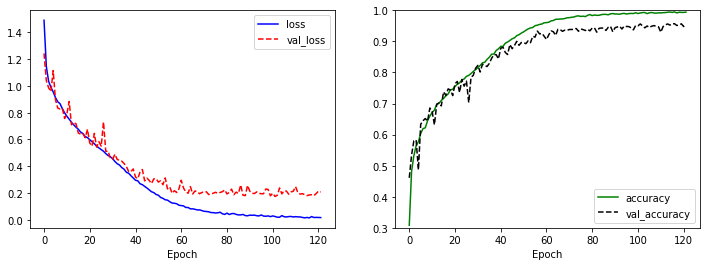

In [ ]:
#그래프
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-',label='loss')
plt.plot(history.history['val_loss'],'r--',label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'g-',label='accuracy')
plt.plot(history.history['val_accuracy'],'k--',label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.3,1)
plt.legend()

plt.show()

In [ ]:
model.evaluate(train_X,train_Y,verbose=0)

[0.03380201384425163, 0.9923999905586243]

In [ ]:
model.evaluate(test_X,test_Y,verbose=0)

[2.2151801586151123, 0.6599264740943909]

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
predictions=model.predict(test_X)
print(predictions)

17/17 [==============================] - 0s 7ms/step
[[9.7140366e-01 2.8577974e-02 1.8175322e-05 7.8391835e-08 8.6537604e-09]
 [3.6325220e-03 9.8908859e-01 7.2768973e-03 1.9459587e-06 1.5326608e-08]
 [9.9789494e-01 2.1004267e-03 4.5895454e-06 1.0915237e-07 4.8568150e-09]
 ...
 [6.5632352e-12 1.7711308e-11 2.7954323e-09 1.8063685e-05 9.9998188e-01]
 [6.0975154e-08 4.1629690e-08 2.3902649e-05 1.5186034e-03 9.9845743e-01]
 [1.7158120e-09 3.1687977e-10 7.5994967e-07 3.7791909e-04 9.9962127e-01]]


In [ ]:
print(confusion_matrix(test_Y,np.argmax(predictions,axis=1)))
print(classification_report(test_Y,np.argmax(predictions,axis=1)))

[[ 29  21   0   0   0]
 [ 18  89  22   1   0]
 [  5  51 125   9   0]
 [  0   7  39  94  10]
 [  0   0   0   2  22]]
              precision    recall  f1-score   support

           0       0.56      0.58      0.57        50
           1       0.53      0.68      0.60       130
           2       0.67      0.66      0.66       190
           3       0.89      0.63      0.73       150
           4       0.69      0.92      0.79        24

    accuracy                           0.66       544
   macro avg       0.67      0.69      0.67       544
weighted avg       0.69      0.66      0.66       544



In [ ]:
confusion_mtx = confusion_matrix(test_Y,np.argmax(predictions,axis=1))

def plot_confusion_matrix(cm, CATEGORIES, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(CATEGORIES))
    plt.xticks(tick_marks, CATEGORIES, rotation=45)
    plt.yticks(tick_marks, CATEGORIES)
    plt.ylabel('True label')
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i,j], horizontalalignment="center", color='white' if cm[i, j] > thresh else "black") 
    
    plt.tight_layout()

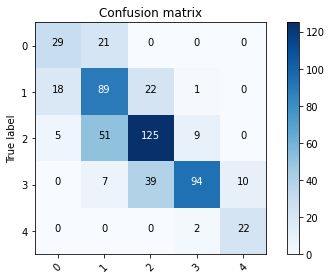

In [ ]:
#confusion_matrix
import itertools

plot_confusion_matrix(confusion_mtx, CATEGORIES)

In [ ]:
from keras.models import load_model
model.save('VGGNET10_ori16000_b1_221026.h5')

In [ ]:
from google.colab import files
files.download('VGGNET10_ori16000_b1_221026.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

시험 구간

In [ ]:
from keras.models import load_model
model = load_model('VGGNET10_generator10_h3.h5')

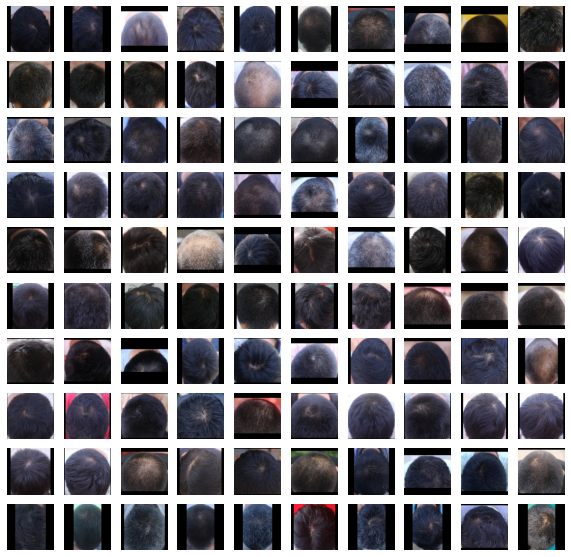

In [ ]:
plt.figure(figsize=(10,10))
for i in range(100):
    plt.subplot(10, 10, i+1)
    plt.axis('off')
    plt.imshow(training_data[i][0])
plt.show()